In [562]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Contesto e obiettivo del modello
In dataset utilizzato contiene vari dati riguardanti la salute e lo stile di vita dei soggetti che hanno partecipato a un sondaggio che viene svolto ogni anno in America, il BRFSS.
L'obiettivo del modello è quello di predire l'insorgenza del diabete, ossia una variabile discreta binaria. 


In [563]:
dataset = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv", sep=",")

# Data Exploration

In [564]:
dataset.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [565]:
len(dataset)

70692

# Descrizione delle variabili contenute nel dataset in esame
- Diabetes_binary: variabile binaria con valore 1 se il soggetto ha prediabete o diabete, 0 altrimenti. 
- HighBP: variabile binaria con valore 1 se il soggetto ha la pressione arteriosa alta, 0 altrimenti.
- HighChol: variabile binaria con valore 1 se il soggetto ha il colesterolo alto, 0 altrimenti.
- CholCheck: variabile binaria che ha valore 1 se il soggetto ha effettuato un controllo del colesterolo negli ultimi 5 anni, 0 altrimenti.
- BMI: variabile che indica l'indice di massa corporea, ossia il parametro più utilizzato in campo medico per valutare l'entità del peso corporeo di un soggetto.
- Smoker: variabile binaria che vale 1 se il soggetto ha fumato almeno 100 sigarette (5 pacchetti) nel corso della sua vita, indipendentemente dal fatto che sia attualmente un fumatore o meno.
- Stroke: variabile binaria che vale 1 se il soggetto ha avuto un ictus, 0 altrimenti.
- HeartDiseaseorAttack: variabile binaria che vale 1 se il soggetto è affetto da Cardiopatia Coronarica (CHD) o se ha avuto un infarto, 0 altrimenti.
- PhysActivity: variabile binaria che vale 1 se il soggetto ha effettuato attività fisica (lavoro escluso) negli ultimi 30 giorni, 0 altrimenti.
- Fruits: variabile binaria che vale 1 se il soggetto di solito consuma almeno una porzione di frutta al giorno, 0 altrimenti.
- Veggies: 	variabile binaria che vale 1 se il soggetto di solito consuma almeno una porzione di verdura al giorno, 0 altrimenti.
- HvyAlcoholConsump: variabile binaria che vale 1 se il soggetto ha un alto consumo di alcol (nello specifico: uomo che di solito beve più di 14 drink a settimana o una donna che beve più di 7 drink a settimana).
- AnyHealthcare: variabile binaria che vale 1 se il soggetto è in possesso di una copertura sanitaria (es. assicurazione o qualcosa di questo tipo). 
- NoDocbcCost: variabile binaria che vale 1 se il soggetto negli ultimi 12 mesi ha rinunciato almeno una volta a un consulto medico a causa del costo.
- GenHlth: variabile che assume valori da 1 a 5 e che corrispondere alla valutazione data dal soggetto riguardo al suo stato di salute (1 = eccellente, 2 = molto buono, 3 = buono, 4 = discreto, 5 = scarso)
- MentHlth: variabile che assume valori da 1 a 30 e che corrisponde ai giorni in cui la salute mentale del soggetto era compromessa (stress, depressione, ansia...) negli ultimi 30 giorni, secondo l'opinione del soggetto stesso.
- PhysHlth: variabile che indica per quanti giorni (negli ultimi 30 giorni) la salute fisica del soggetto non è stata molto buona (malattia, infortuni ...).	
- DiffWalk: variabile binaria che vale 1 se il soggetto ha serie difficoltà a camminare o a fare le scale, 0 altrimenti.
- Sex: variabile binaria che vale 1 se il soggetto è un uomo, 0 se è una donna.
- Age: variabile che assume valori da 1 a 13 in base alla classe d'età a cui appartiene il soggetto (es. 1 = 18-24 anni, 2 = 25-29 anni, ..., 12 = 75-79 anni, 13 = 80 anni o più).	
- Education: variabile che assume valori da 1 a 6 e indica il livello di istruzione (1 = mai frequentato una scuola, 2 = scuola elementare, 3 = scuola media, 4 = scuola superiore, 5 = università da 1 a 3 anni , 6 = università 4 o più anni).
- Income: variabile che rappresenta il reddito del soggetto in una scala da 1 a 8 (1 = meno di $10,000, 5 = meno di $35,000, 8 = $75,000 o più).

In [566]:
for name, array in dataset.items():
    print(name, array.dtype, array.shape)

Diabetes_binary float64 (70692,)
HighBP float64 (70692,)
HighChol float64 (70692,)
CholCheck float64 (70692,)
BMI float64 (70692,)
Smoker float64 (70692,)
Stroke float64 (70692,)
HeartDiseaseorAttack float64 (70692,)
PhysActivity float64 (70692,)
Fruits float64 (70692,)
Veggies float64 (70692,)
HvyAlcoholConsump float64 (70692,)
AnyHealthcare float64 (70692,)
NoDocbcCost float64 (70692,)
GenHlth float64 (70692,)
MentHlth float64 (70692,)
PhysHlth float64 (70692,)
DiffWalk float64 (70692,)
Sex float64 (70692,)
Age float64 (70692,)
Education float64 (70692,)
Income float64 (70692,)


Variabile target: Diabetes_binary 

Variabili categoriche: HighBP, HighChol, CholCheck,  Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump,  AnyHealthcare, NoDocbcCost, DiffWalk, Sex, ,Education, Income,.

Variabili continue: BMI,GenHlth,MentHlth, PhysHlth,Age.



Siccome non c'è una colonna che svolge ruolo di chiave primaria, mi creo un vettore contenente i numeri di riga, lo aggiungo al mio data frame e lo uso come indice. 

In [567]:
dataset['id'] = range(0,70692)
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,id
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0,0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0,1
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0,2
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0,3
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0,4


In [568]:
dataset = dataset.set_index('id')
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


Grazie al metodo describe posso ottenere rapidamente tutte le statistiche riguardanti il mio dataset: 

In [569]:
dataset.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Rilevazione di valori nulli e dati non rilevanti
Procedo verificando se ci sono valori nulli e nel caso li andrò a sostituire con valori medi che non comprometterebbero le operazioni sui dati. Inoltrè rimuoverò anche eventuali colonne contenenti sempre lo stesso valore (per esempio se tra i dati raccolti, la colonna contenente i dati riguardati le porzioni di frutta giornaliere ha tutti valori uguali a 1, ha senso rimuoverla poichè irrilevante in questo caso).

In [570]:
dataset.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Dal risultato ottenuto possiamo notare che nel dataset non sono presenti valori nulli, quindi non sarà necessario effettuale alcuna sostituzione.
Dalla media calcolata su ciascuna variabile precedentemente, deduco che non sia necessario eliminare alcuna colonna (le colonne delle variabili binarie per esempio non hanno mai media 0 o 1).

# Analisi della distribuzione delle variabili tramite grafici

Ho scelto un dataset in cui la variabile target è bilanciata e il grafico a torta sotto riportato ne è la conferma.

<Axes: ylabel='count'>

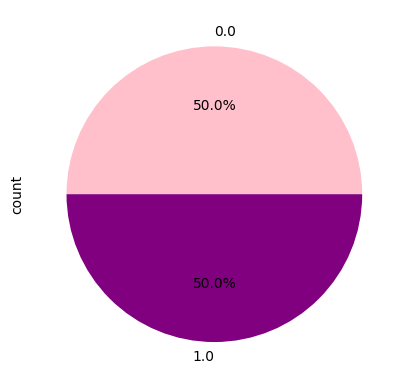

In [571]:
dataset['Diabetes_binary'].value_counts().plot.pie(autopct='%1.1f%%', colors=[ "pink", "purple" ])

Analisi delle variabile continue (BMI, GenHlth, MentHlth, PhysHlth, Age)

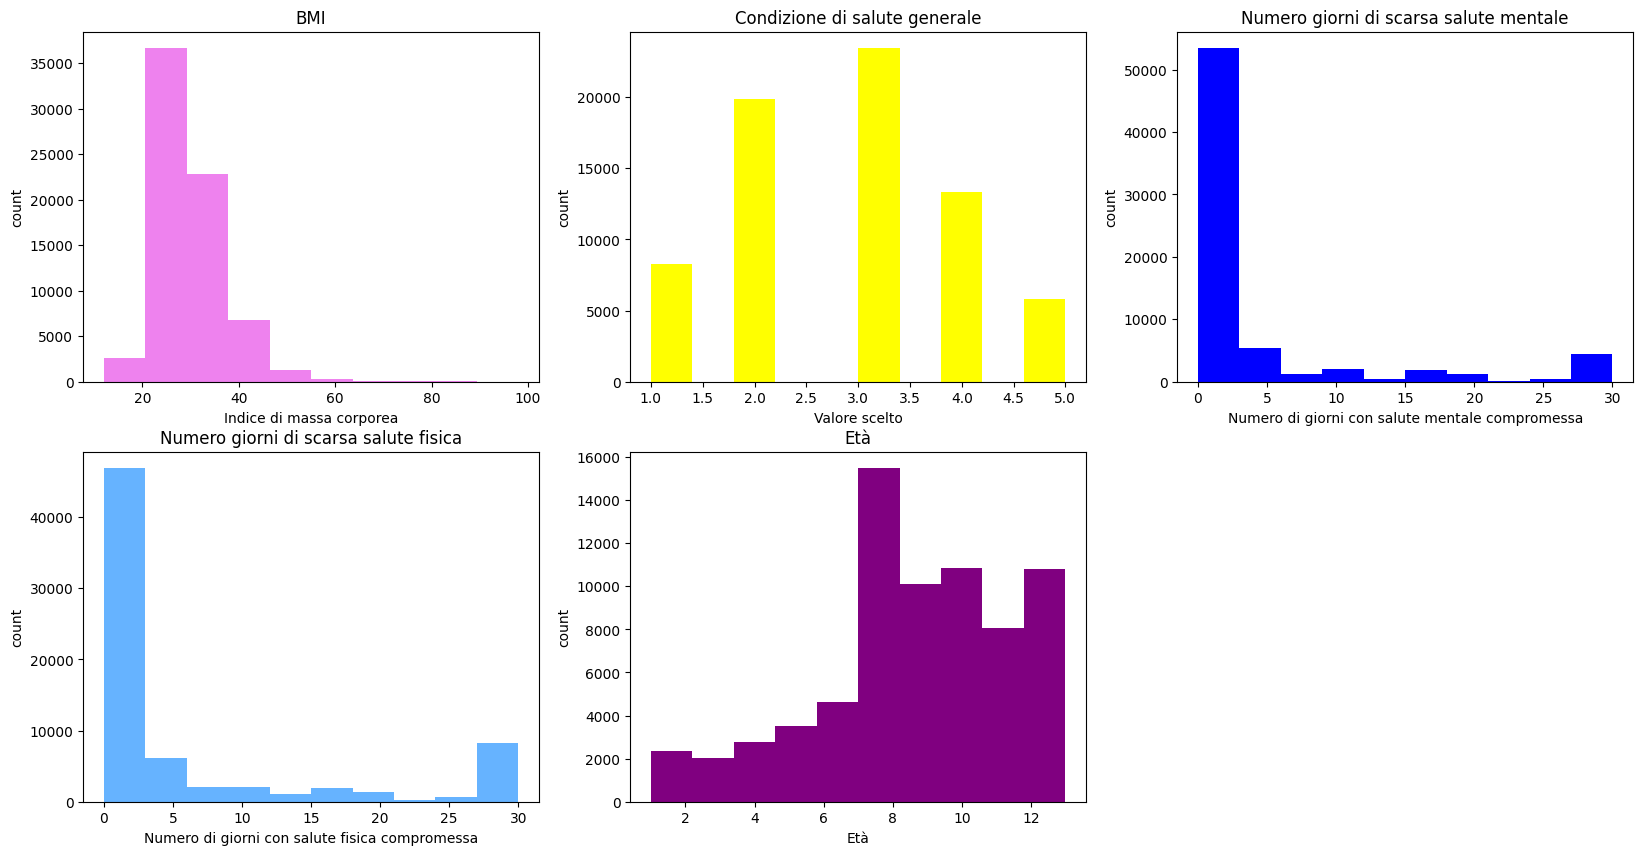

In [572]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('BMI')
plt.hist(dataset['BMI'], label="BMI", color='violet')
plt.ylabel('count')
plt.xlabel('Indice di massa corporea')

plt.subplot(2, 3, 2)
plt.title('Condizione di salute generale')
plt.hist(dataset['GenHlth'], label="GenHlth", color='yellow')
plt.ylabel('count')
plt.xlabel('Valore scelto')

plt.subplot(2, 3, 3)
plt.title('Numero giorni di scarsa salute mentale')
plt.hist(dataset['MentHlth'], label="MentHlth", color='blue')
plt.ylabel('count')
plt.xlabel('Numero di giorni con salute mentale compromessa')

plt.subplot(2, 3, 4)
plt.title('Numero giorni di scarsa salute fisica')
plt.hist(dataset['PhysHlth'], label="PhysHlth", color='#66b3ff')
plt.ylabel('count')
plt.xlabel('Numero di giorni con salute fisica compromessa')


plt.subplot(2, 3, 5)
plt.title('Età')
plt.hist(dataset['Age'], label="Age", color='purple')
plt.ylabel('count')
plt.xlabel('Età')




plt.show()



BMI: notiamo che in generale la maggior parte dei soggetti ha un BMI che va da 20 a 40. Più precisamente possiamo verificare con un grafico a torta, quanti soggetti hanno un BMI più alto del normale (un soggetto normopeso di solito non supera la soglia del 25).

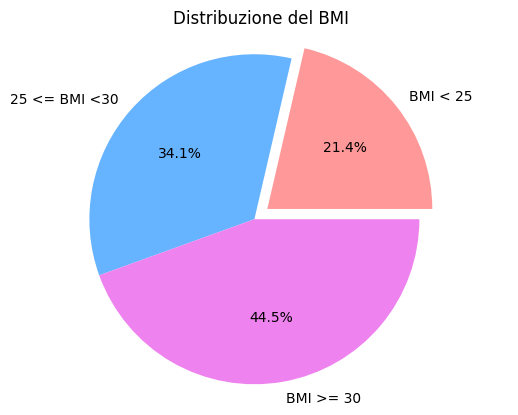

In [573]:
bmi_minore_di_25 = dataset[dataset['BMI'] < 25].shape[0]
bmi_da_25_a_30 = dataset[(dataset['BMI'] >= 25) & (dataset['BMI'] < 30)].shape[0]
bmi_maggiore_di_30 = dataset[dataset['BMI'] >= 30].shape[0]

plt.pie([bmi_minore_di_25, bmi_da_25_a_30, bmi_maggiore_di_30 ],explode = (0.1, 0, 0), labels = ['BMI < 25', '25 <= BMI <30', 'BMI >= 30'], colors = ['#ff9999','#66b3ff', 'violet'], autopct='%1.1f%%')
plt.axis('equal')  # Assicura che il grafico sia disegnato come un cerchio

plt.title('Distribuzione del BMI')
plt.show()

Dal grafico è evidente che solo una piccola parte (21.4%) dei soggetti coinvolti nel sondaggio sono normopeso. Il 34.1% rientra nella fascia dei soggetti sovrappeso, i restanti invece (44.5%) sono soggetti obesi.   

Condizione di salute generale: la maggioranza delle persone ritiene il proprio stato di salute buono. Vediamo in percentuale quanti sono i soggetti che ritengono il proprio stato di salute discreto/scarso mediante un grafico a torta. 

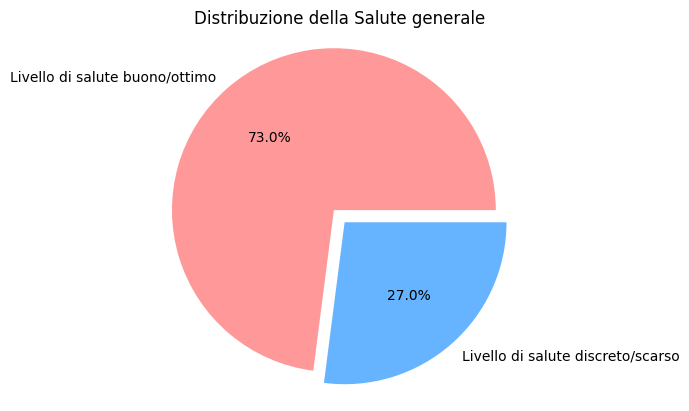

In [574]:
buona_salute = dataset[dataset['GenHlth'] < 4].shape[0]
scarsa_salute = dataset[dataset['GenHlth'] >= 4].shape[0]

plt.pie([buona_salute, scarsa_salute ],explode = (0.1, 0), labels = ['Livello di salute buono/ottimo', 'Livello di salute discreto/scarso'], colors = ['#ff9999','#66b3ff'], autopct='%1.1f%%')
plt.axis('equal')  # Assicura che il grafico sia disegnato come un cerchio

plt.title('Distribuzione della Salute generale')
plt.show()

Osserviamo quindi che circa 1/4 dei soggetti intervistati non ha un livello di salute generale buono. 

Livello di salute mentale: possiamo notare dall'istogramma che la grande maggioranza dei soggetti coinvolti ha avuto il ottimo livello di salute mentale negli ultimi 30 giorni.

Livello di salute fisica: anche in questo caso la maggioranza dei soggetti sono stati ammalati/infortunati per meno di 5 giorni. 

Età: in questo caso notiamo che i la maggior parte dei soggetti rientra dalla fascia di età numero 6 in su (quindi molti soggetti hanno almeno 50 anni ).

Ora grazie al grafico plot box rappresento graficamente le varie statistiche calcolate in precedenza sulle variabili continue (BMI, GenHlth, MentHlth, PhysHlth, Age): 


Text(0, 0.5, 'Anni')

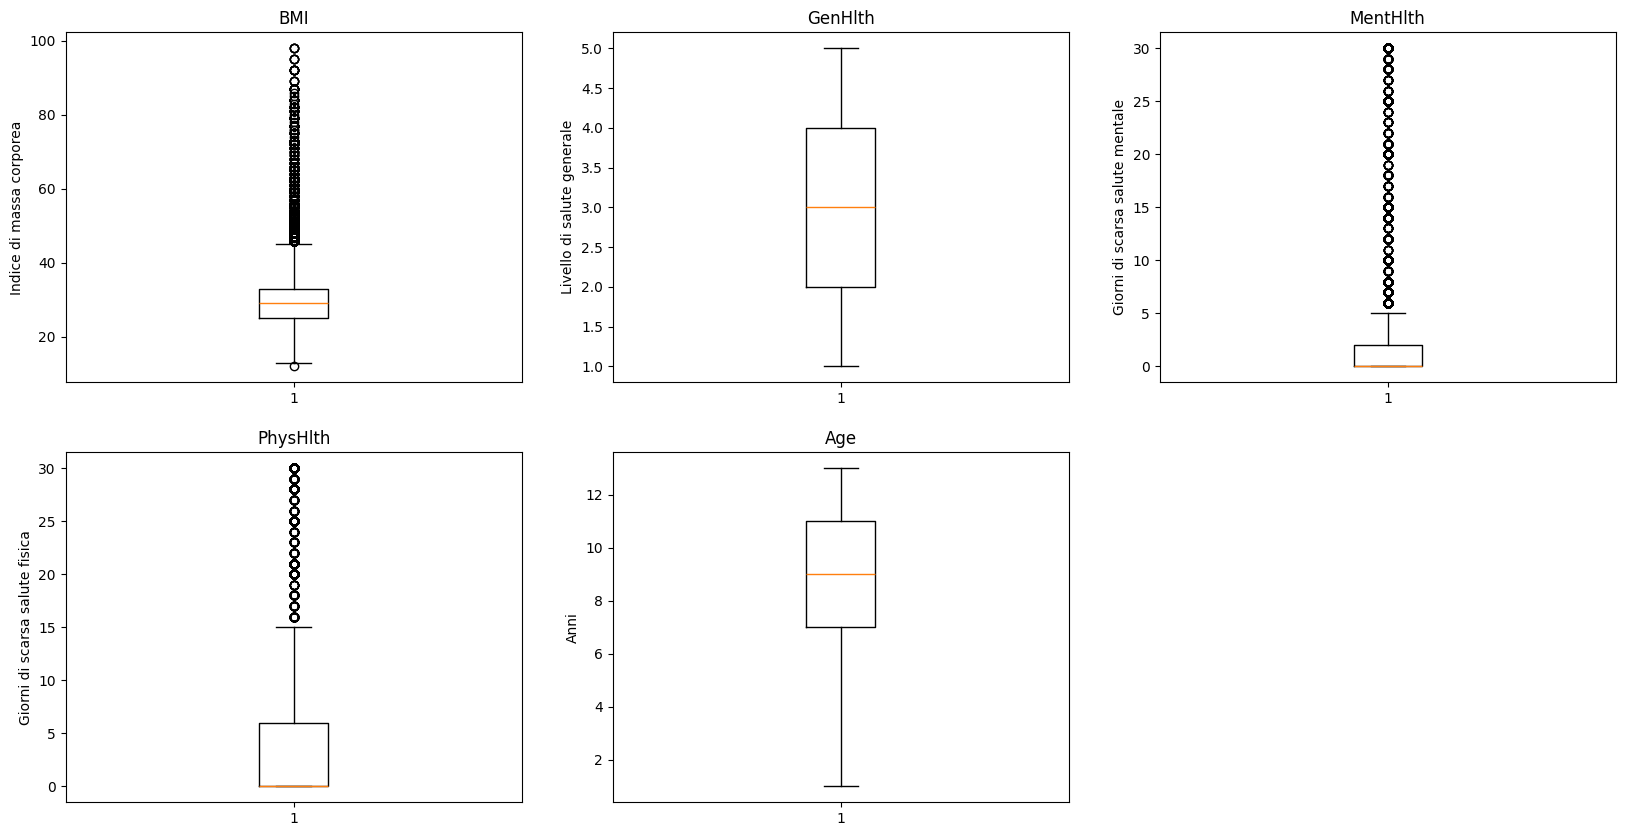

In [575]:
plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
plt.title('BMI')
plt.boxplot(dataset['BMI'])
plt.ylabel('Indice di massa corporea')


plt.subplot(2, 3, 2)
plt.title('GenHlth')
plt.boxplot(dataset['GenHlth'])
plt.ylabel('Livello di salute generale')


plt.subplot(2, 3, 3)
plt.title('MentHlth')
plt.boxplot(dataset['MentHlth'])
plt.ylabel('Giorni di scarsa salute mentale')


plt.subplot(2, 3, 4)
plt.title('PhysHlth')
plt.boxplot(dataset['PhysHlth'])
plt.ylabel('Giorni di scarsa salute fisica')


plt.subplot(2, 3, 5)
plt.title('Age')
plt.boxplot(dataset['Age'])
plt.ylabel('Anni')





Analisi delle variabili categoriche (HighBP, HighChol, CholCheck,  Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump,  AnyHealthcare, NoDocbcCost, DiffWalk, Sex,Education, Income)

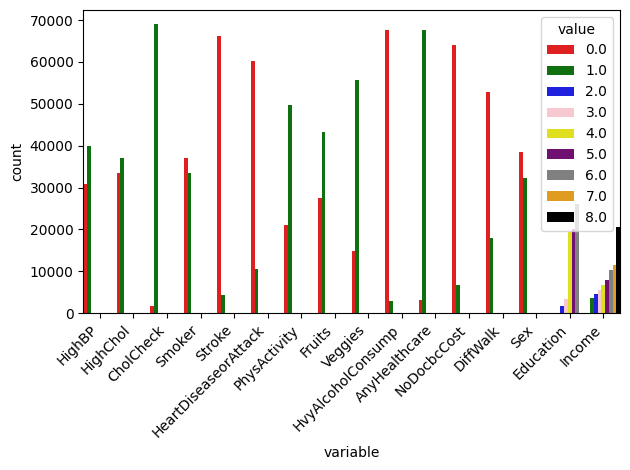

In [576]:
variabili_categoriche = dataset.loc[:, ['HighBP','HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex','Education', 'Income']]
palette = sns.color_palette(['red', 'green', 'blue', 'pink', 'yellow', 'purple', 'grey', 'orange', 'black']);
sns.countplot(x="variable", hue="value", data = pd.melt(variabili_categoriche), width = 1, palette=palette);

# Ruotare e distanziare le etichette dell'asse x
plt.xticks(rotation=45, ha='right')

# Migliorare il layout per evitare sovrapposizioni
plt.tight_layout()

# Mostrare il grafico
plt.show()

In generale grazie all'istogramma riportato qui sopra noto che: 
- la maggioranza dei soggetti ha pressione alta
- per quanto riguarda colesterolo, sbitudine del fumo e sesso, i soggetti sono abbastanza bilanciati (non sono esattamente divisi a metà ma non c'è troppa differenza)
- quasi tutti hanno eseguito un controllo del colesterolo negli ultimi 5 anni
- pochi soggetti hanno avuto un ictus precedentemente
- una buona parte cerca di seguite un corretto stile di vita facendo attività fisica e consumando frutta e verdura ogni giorno
- i soggetti con un alto consumo di alcol durante la settimana sono una piccola minoranza
- quasi tutti hanno una copertura sanitaria e in pochi hanno dovuto rinunciare a un consulto medico a causa della spesa che comporta
- la maggioranza dei soggetti non ha problemi a camminare e salire le scale
- la maggioranza dei soggetti ha un'istruzione superiore alla scuola media
- considerando che il reddito medio americano è intorno ai 70.000 che equivale alla fascia 7/8, molti soggetti hanno un reddito inferiore alla media

Ora provo a mettere in relazione la variabile target con quelle categoriche appena analizzate, per cercare di capire se graficamente posso già apprendere qualche informazione dai dati: 

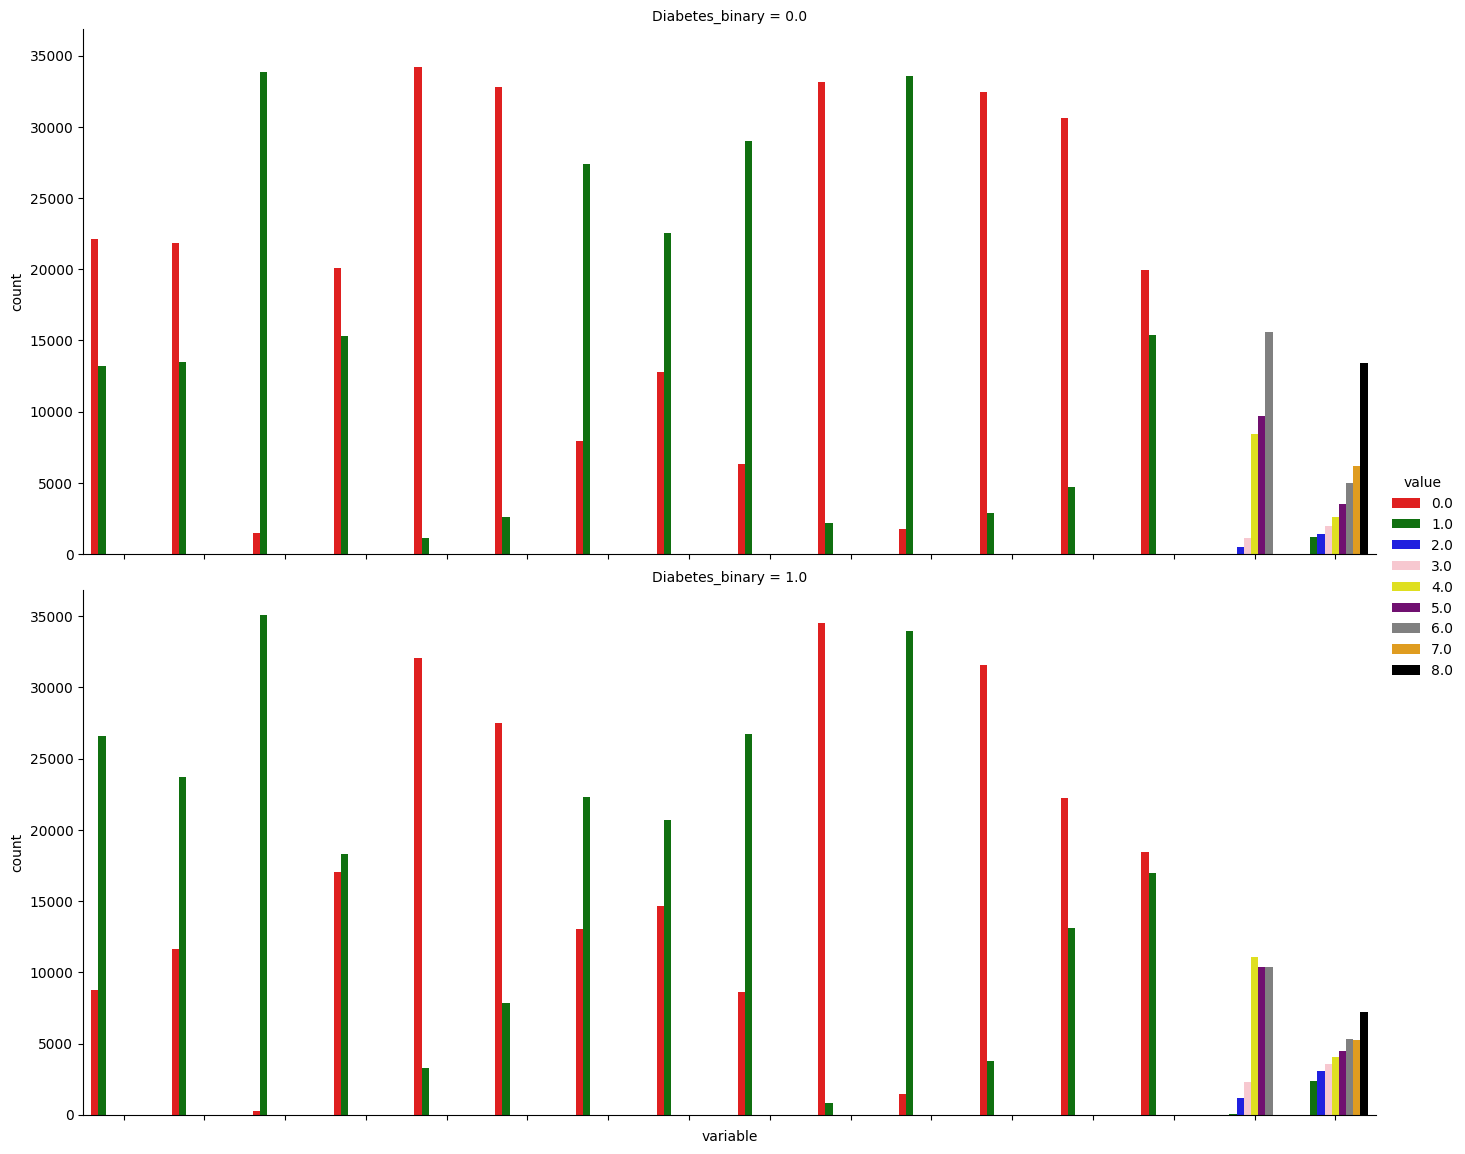

In [577]:

df_long = pd.melt(dataset, id_vars=['Diabetes_binary'], value_vars=['HighBP','HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex','Education', 'Income'])
grafico = sns.catplot(x="variable", hue="value", col="Diabetes_binary", data=df_long, kind="count",palette=palette,height=7, aspect=2,col_wrap=1);
# Ruotare e allineare le etichette dell'asse x
grafico.set_xticklabels(rotation=45, ha='right')

# Aggiustare il layout per evitare sovrapposizioni
plt.subplots_adjust(bottom=0.2, wspace=0.4)

# Mostrare il grafico
plt.show()

Possiamo notare che: 
- i soggetti senza diabete/prediabete prevalentemente:  hanno pressione e colesterolo a livelli normali, non hanno fumato più di 100 sigarette nella loro vita, non hanno problemi di cuore, seguono uno stile di vita abbastanza sano (attività fisica e consumo giornaliero di frutta e verdura), non consumano molto alcol, non hanno alcun problema a camminare/fare le scale, hanno un reddito e un livello di educazione più alto.
- i soggetti con diabete o prediabete invece: hanno livelli pressione e colesterolo più alti del normale, la maggioranza hanno fumato più di 5 pacchetti di sigarette nel corso della loro vita, i problemi di cuori tra loro sono più frequenti, anche loro seguono abitudini abbastanza sane (attività fisica e consumo di frutto e verdura ogni giorno), problemi motori per quanto riguarda la camminata e la salita delle scale sono più frequenti, hanno un livello di istruzione e di reddito un po' più basso.

Ora costruisco una matrice di correlazione per verificare se ci sono features altamente correlate

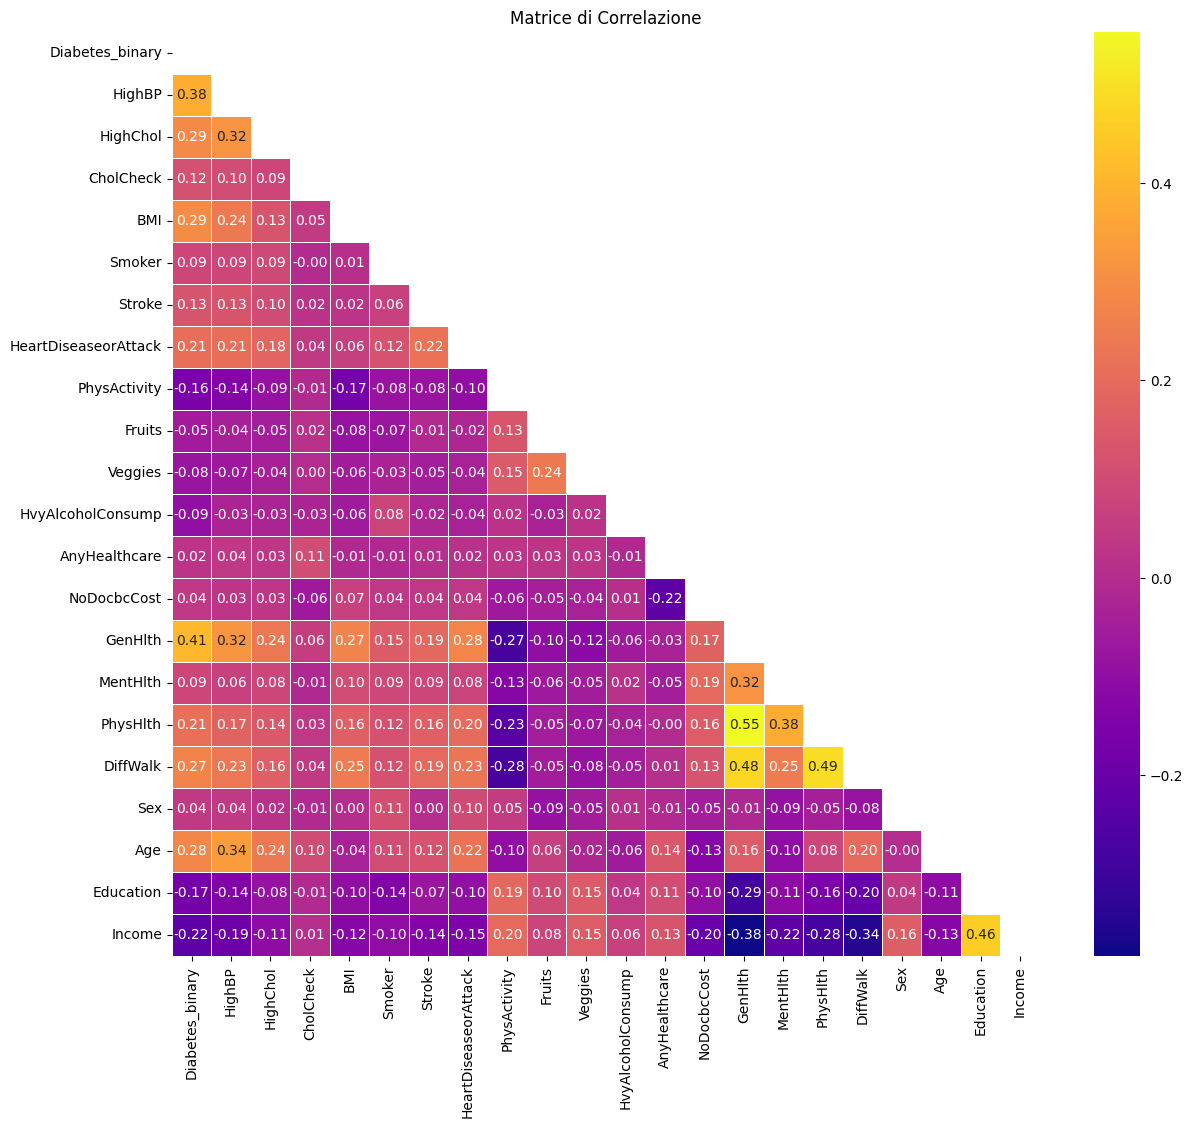

In [578]:
matrice_correlazione = dataset.corr()

mask = np.triu(np.ones_like(matrice_correlazione, dtype=bool))

plt.figure(figsize=(14, 12))
sns.heatmap(matrice_correlazione, annot=True, cmap='plasma', fmt='.2f', linewidths=0.5, mask=mask)
plt.title('Matrice di Correlazione')
plt.show()

Dalla matrice di correlazione , vorrei porre l'attenzione sulle seguenti correlazioni: 
- Colesterolo-Pressione : spesso se si ha il colesterolo alto, si è più propensi ad avere anche la pressione alta 
- BMI-Pressione: è una correlazione molto sensata, infatti ci sono studi medici che provano che l'aumento del BMI è associato a un rischio maggiore di sviluppare ipertensione.
- Problemi di cuore-Pressione: è più che sensato dato che la pressione alta è uno dei principali fattori di rischio per lo sviluppo di malattie cardiache.
- Problemi di cuore-Ictus: sono due problemi medici strettamente correlati in quanto hanno meccanismi e fattori di rischio comuni. 
- Età-Pressione: anche questa correlazione è più che sensata, è noto infatti che con l'avanzare dell'età la pressione sanguigna di solito tende ad aumentare gradualmente.
- Diabete-Età-Salute generale-Problemi di cuore-BMI-Pressione-Colesterolo: in generale guardando la matrice sembra che queste siano le feature più correlate con la varaibile target.  

Inoltre siccome dalla matrice di correlazione, nella riga "GenHlth" ho notato valori a mio parere poco sensati, ritengo opportuno eliminare la colonna "GenHlth" (si tratta infatti di una colonna che non contiene dati oggettivi, ma valutazioni riguardo alla salute generale espressa dal soggetto stesso).

In [579]:
dataset = dataset.drop('GenHlth', axis=1)
dataset = dataset.drop('MentHlth', axis=1)
dataset = dataset.drop('PhysHlth', axis=1)

dataset.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,Age,Education,Income
id,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,8.0,5.0,8.0


Ho scelto di eliminare le colonne sulla salute generale, fisica e psicologica perchè dalla matrice della correlazione è evidente che non siano molto rilevanti, inoltre non credo sia appropriato utilizzarle perchè i valori che contengono sono frutto di una valutazione soggettiva effettuata dal soggetto stesso. 

# Preparazione di training set e validation set

Innanzitutto converto le variabile categoriche in insiemi di colonne (una per ogni categoria possibile) che verranno aggiunti al mio dataframe.

In [580]:
var_categoriche = ['Education', 'Income']
#Utilizzo one hot encoding
dataset= pd.get_dummies(dataset, columns=var_categoriche, prefix=var_categoriche, dtype=int)

dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Education_5.0,Education_6.0,Income_1.0,Income_2.0,Income_3.0,Income_4.0,Income_5.0,Income_6.0,Income_7.0,Income_8.0
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1


In [581]:
from sklearn.model_selection import train_test_split

x=dataset.drop('Diabetes_binary', axis=1)
y=dataset['Diabetes_binary']

x_train, x_val, y_train, y_val = train_test_split(
    x, y,           
    test_size=1/3,    # proporzione: 2/3 training, 1/3 validation
    random_state=42,   
    stratify=y.values
)

Siccome devo prevedere una variabile binaria, adrò ad addestrare dei modelli di classificazione. Trai vari modelli ho scelto di utilizzare: Perceptron, Logistic regression, SVM e alberi decisionali.

Prima di tutto importo le librerie che mi serviranno per il calcolo delle performance (errore relativo, MSE e R2)

In [582]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(5, shuffle=True, random_state=42)

def errore_relativo(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# Percettrone

In [583]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

model = Pipeline([
    ('scaler', StandardScaler()),   # Standardizzazione delle feature
    ('perceptron', Perceptron(random_state=42))  # Modello Perceptron
])

# Addestramento della pipeline sul set di addestramento
model.fit(x_train, y_train)

# Predizione sui dati di test
y_pred = model.predict(x_val)

# Valutazione del modello
accuracy = accuracy_score(y_val, y_pred)*100
print(f'Accuratezza: {accuracy:.2f}%')



Accuratezza: 65.50%


In [584]:
from sklearn.metrics import confusion_matrix

#uso la matrice di confusione per valutare l'accuratezza del modello
cm = confusion_matrix(y_val, y_pred)
accuracy2= cm.diagonal().sum() / cm.sum()*100
print(f'Accuratezza calcolata con matrice di confusione: {accuracy2:.2f}%')

Accuratezza calcolata con matrice di confusione: 65.50%


In [585]:
#Calcolo delle performance
perc_errore_relativo = errore_relativo(y_val, y_pred)
perc_MSE = mean_squared_error(y_val, y_pred)
perc_r_squared = r2_score(y_val, y_pred)

print('Errore relativo del modello perceptron: ', perc_errore_relativo)
print('Errore MSE del modello perceptron: ', perc_MSE)
print('Errore R2 del modello perceptron: ', perc_r_squared)

Errore relativo del modello perceptron:  inf
Errore MSE del modello perceptron:  0.34501782379901547
Errore R2 del modello perceptron:  -0.38007129519606186


In [586]:
#parametri migliori

# Regressione Logistica

In [587]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(solver="saga", penalty="l1", C=0.1))
])
model.fit(x_train, y_train)

# Predizione sui dati di validazione
y_pred = log_reg.predict(x_val)

grid={
        "scaler": [None, StandardScaler()],
        "lr__penalty": ["elasticnet"],
        "lr__C": np.logspace(-2, 2, 5),
        "lr__l1_ratio": [0.2, 0.5]
    }

gridSearch = GridSearchCV(model, grid, cv=skf)
gridSearch.fit(x_train, y_train)
# Valutazione del modello
accuracy = accuracy_score(y_val, y_pred)*100
print(f'Accuracy: {accuracy:.2f}%')


C:\Users\Utente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Utente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Utente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Utente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: C

Accuracy: 73.73%


C:\Users\Utente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [588]:
#uso la matrice di confusione per valutare l'accuratezza del modello
cm = confusion_matrix(y_val, y_pred)
accuracy2= cm.diagonal().sum() / cm.sum()*100
print(f'Accuratezza calcolata con matrice di confusione: {accuracy2:.2f}%')

Accuratezza calcolata con matrice di confusione: 73.73%


In [589]:

pd.Series(model.named_steps["lr"].coef_[0], index=x_train.columns)

HighBP                  0.416607
HighChol                0.324070
CholCheck               0.204854
BMI                     0.587299
Smoker                  0.018332
Stroke                  0.078281
HeartDiseaseorAttack    0.167295
PhysActivity           -0.059257
Fruits                 -0.022947
Veggies                -0.030602
HvyAlcoholConsump      -0.148045
AnyHealthcare           0.003124
NoDocbcCost             0.038720
DiffWalk                0.181857
Sex                     0.140798
Age                     0.395902
Education_1.0           0.004943
Education_2.0           0.042667
Education_3.0           0.021439
Education_4.0           0.000000
Education_5.0           0.009996
Education_6.0          -0.070572
Income_1.0              0.074694
Income_2.0              0.062434
Income_3.0              0.041984
Income_4.0              0.034501
Income_5.0              0.000000
Income_6.0             -0.027807
Income_7.0             -0.037494
Income_8.0             -0.136101
dtype: flo

In [590]:
#Calcolo delle performance
logReg_errore_relativo = errore_relativo(y_val, y_pred)
logReg_MSE = mean_squared_error(y_val, y_pred)
logReg_r_squared = r2_score(y_val, y_pred)

print('Errore relativo del modello logistic regression: ', logReg_errore_relativo)
print('Errore MSE del modello logistic regression: ', logReg_MSE)
print('Errore R2 del modello logistic regression: ', logReg_r_squared)

Errore relativo del modello logistic regression:  inf
Errore MSE del modello logistic regression:  0.26268884739433035
Errore R2 del modello logistic regression:  -0.0507553895773214


In [591]:
gridSearch.best_params_

{'lr__C': 1.0,
 'lr__l1_ratio': 0.5,
 'lr__penalty': 'elasticnet',
 'scaler': StandardScaler()}

# SVM

In [592]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# Definizione della pipeline con StandardScaler e LinearSVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),     # Standardizzazione delle feature
    ('svc', LinearSVC(random_state=42, max_iter=10000))  # Modello SVM lineare
])

# Addestramento della pipeline sul set di addestramento
pipeline.fit(x_train, y_train)

# Predizione sui dati di validazione
y_pred = pipeline.predict(x_val)

# Calcolo dell'accuratezza come percentuale
accuracy = accuracy_score(y_val, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 73.78%


In [593]:
#Accuratezza con matrice di confusione

In [594]:
#calcolo delle performance
svm_errore_relativo = errore_relativo(y_val, y_pred)
svm_MSE = mean_squared_error(y_val, y_pred)
svm_r_squared = r2_score(y_val, y_pred)

print('Errore relativo del modello SVM: ', svm_errore_relativo)
print('Errore MSE del modello SVM: ', svm_MSE)
print('Errore R2 del modello SVM: ', svm_r_squared)

Errore relativo del modello SVM:  inf
Errore MSE del modello SVM:  0.26222203361059243
Errore R2 del modello SVM:  -0.048888134442369724


In [595]:
#parametri migliori con grid search

# Alberi decisionali

In [596]:
from sklearn.tree import DecisionTreeClassifier

# Definizione della pipeline con StandardScaler e DecisionTreeClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),     # Standardizzazione delle feature
    ('decision_tree', DecisionTreeClassifier(random_state=42))  # Modello Decision Tree
])

# Addestramento della pipeline sul set di addestramento
pipeline.fit(x_train, y_train)

# Predizione sui dati di validazione
y_pred = pipeline.predict(x_val)

# Calcolo dell'accuratezza come percentuale
accuracy = accuracy_score(y_val, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')


Accuracy: 64.03%


In [597]:
#Accuratezza con matrice di confusione

In [598]:
#calcolo delle performance
ad_errore_relativo = errore_relativo(y_val, y_pred)
ad_MSE = mean_squared_error(y_val, y_pred)
ad_r_squared = r2_score(y_val, y_pred)

print('Errore relativo del modello Alberi decisionali: ', ad_errore_relativo)
print('Errore MSE del modello Alberi decisionali: ', ad_MSE)
print('Errore R2 del modello Alberi decisionali: ', ad_r_squared)

Errore relativo del modello Alberi decisionali:  inf
Errore MSE del modello Alberi decisionali:  0.35970123917840774
Errore R2 del modello Alberi decisionali:  -0.43880495671363096


In [599]:
#parametri migliori